1- Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa. Em uma das simulações, introduza um defeito de massa:  substitua uma massa m2 (m2=5m)
 
Parâmetros
• Massas padrão:  m=1 kg
 • Constante elástica: k = 1 N/m
 • Tamanhos da cadeia: N = 100, 1000 e 10.000
• Defeito: massa igual a m2 = 5kg  (apenas em uma das simulações)
 
Tarefas
1. Cálculo das Frequências de Vibração
• Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:
• Cadeia homogênea (todas as massas iguais)
• Cadeia com defeito de massa no centro
2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.
• Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.
3. Deslocamentos Relativos (Modos Normais)
• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:
• Às cinco menores frequências (modos de baixa energia)
• Às cinco maiores frequências (modos de alta energia)
• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.
4. Análise e Comparação
• Analise como o tamanho da cadeia e a presença do defeito afetam:
• A distribuição das frequências (densidade de estados)
• Os padrões de deslocamento dos modos normais
• Discuta a localização dos modos associados ao defeito de massa.
Orientações para Implementação em Python
• O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa do processo.
• Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.
• Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.
• Para grandes valores de , otimize o código para eficiência computacional.
• Disponibilize o código final em um repositório no GitHub e inclua o link no relatório.
 
Instruções para Entrega
 • A resposta deve ser enviada via Moodle devidamente comentada.
• Inclua todos os gráficos gerados (histogramas, modos normais, etc.) no arquivo de resposta, pois não será possível rodar todos os programas novamente para correção.
• Certifique-se de que cada gráfico esteja devidamente identificado e relacionado ao caso analisado.
 
Sugestão de Estrutura para a resposta
1. Introdução
• Breve explicação do modelo massa-mola e sua relevância para cadeias atômicas.
2. Metodologia
• Descrição do método numérico utilizado para calcular frequências e modos.
3. Resultados
• Histogramas das densidades de estados para cada caso.
• Gráficos dos deslocamentos relativos para os modos selecionados.
• Tabela comparativa dos principais resultados.
4. Discussão
• Interpretação dos efeitos do tamanho da cadeia e do defeito de massa.
• Observações sobre a localização dos modos e possíveis aplicações.
5. Conclusão
• Síntese dos principais achados.
Observação: Comente o código de forma clara, disponibilize o link do GitHub e anexe todos os gráficos no Moodle para garantir a avaliação completa.
Texto de resposta Questão 1



















In [34]:
import numpy as np
import matplotlib.pyplot as plt


#CERTO
def montar_matrizes(N, m=1.0, k=1.0, defeito=False, m2=5.0):
    """
    Monta o vetor de massas e a matriz de rigidez K densa para uma cadeia circular:
    - N massas de valor m (ou m2 no defeito, na posição N//2)
    - Molas de constante k, com contorno periódico (1 ligada a N).
    Retorna (vet_masas, K) como arrays NumPy densos.
    """
    vet_masas = np.ones(N) * m
    if defeito:
        vet_masas[N // 2] = m2

    # Matriz de rigidez K densa
    K = np.zeros((N, N))
    # diagonal principal
    np.fill_diagonal(K, 2 * k)
    # diagonais secundárias
    for i in range(N - 1):
        K[i, i+1] = -k
        K[i+1, i] = -k
    # contorno periódico
    K[0, N-1] = -k
    K[N-1, 0] = -k

    return vet_masas, K


In [36]:

montar_matrizes(10)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
        [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]]))

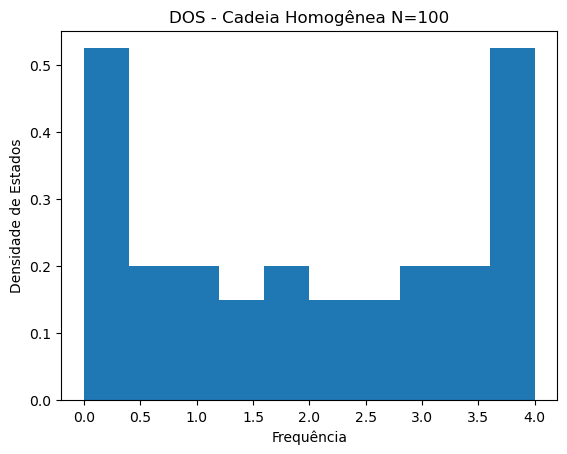

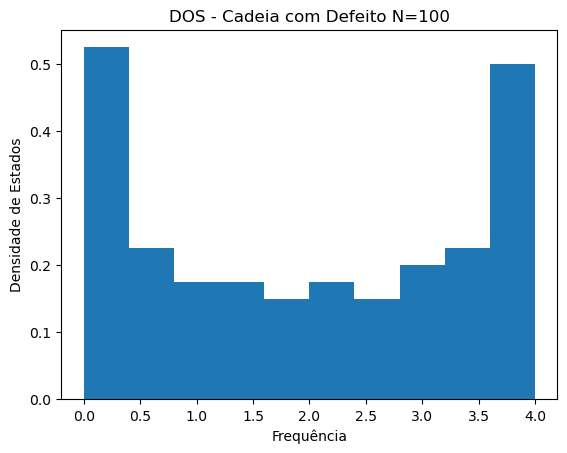

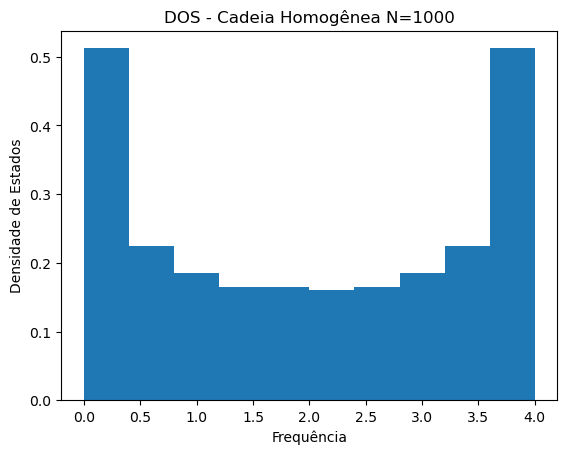

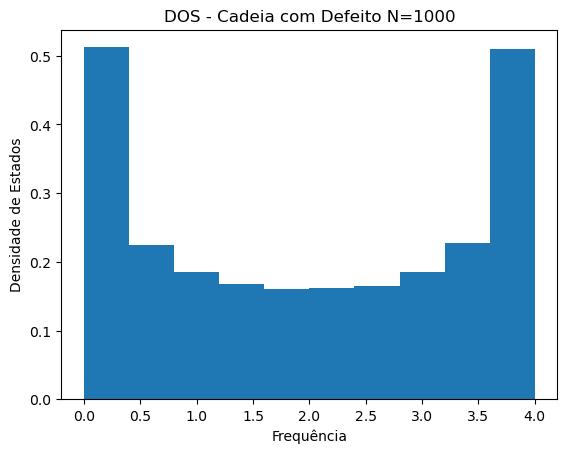

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def montar_matrizes(N, m=1.0, k=1.0, defeito=False, m2=5.0):
    vet_masas = np.ones(N) * m
    if defeito:
        vet_masas[N // 2] = m2
    K = np.zeros((N, N))
    np.fill_diagonal(K, 2 * k)
    for i in range(N - 1):
        K[i, i+1] = -k
        K[i+1, i] = -k
    K[0, N-1] = -k
    K[N-1, 0] = -k
    return vet_masas, K

def calc_eigenvals(N, defeito=False, m2=5.0):
    vet_masas, K = montar_matrizes(N, defeito=defeito, m2=m2)
    M_inv = np.diag(1.0 / vet_masas)
    A = M_inv.dot(K)
    eigenvals, _ = np.linalg.eig(A)
    eigenvals = np.real(eigenvals)
    eigenvals[eigenvals < 0] = 0.0
    return np.sort(eigenvals)

Ns = [100, 1000, 10000]
bins = 10

for N in Ns:
    eig_homog = calc_eigenvals(N, defeito=False)
    eig_def = calc_eigenvals(N, defeito=True)
    
    plt.figure()
    plt.hist(eig_homog, bins=bins, density=True)
    plt.xlabel('Frequência')
    plt.ylabel('Densidade de Estados')
    plt.title(f'DOS - Cadeia Homogênea N={N}')
    plt.show()
    
    plt.figure()
    plt.hist(eig_def, bins=bins, density=True)
    plt.xlabel('Frequência')
    plt.ylabel('Densidade de Estados')
    plt.title(f'DOS - Cadeia com Defeito N={N}')
    plt.show()
